# 24.07.12 머신러닝 학습 3회차: 결정 트리

## 01 개념

### 결정 트리(Decision Tree)

1. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것이다.

2. 데이터를 어떤 기준을 바탕으로 <규칙>을 만들어야 가장 효율적인 분류가 될 것인가.

3. 자식 노드가 없으면 리프 노드, 자식 노드가 있으면 브랜치 노드.

4. 과적합을 막기 위해 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면?

5. 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있는 결정 노드의 <규칙>이 정해져야 한다.

6. 가장 큰 장점은 정보의 <균일도>라는 룰을 기반으로 하여 알고리즘이 쉽고 직관적이다.

7. <균일도>만 신경쓰면 되므로 특별한 경우를 제외하고 스케일링, 정규화 전처리가 필요없다.

### 분할 규칙

1. 최대한 <균일한> 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.

2. 데이터 세트가 <균일>하지 않을수록 필요한 정보의 양이 많아진다.

3. 결정 노드는 <정보 균일도>가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

4. 많은 데이터가 공통적으로 가진 규칙이 있다면 그게 가장 첫 번째로 만들어져야 하는 규칙일테니까.

5. 왜냐면 적은 정보의 양으로 가장 쉽게 예측할 수 있고, 그다음 순서로 가는 게 가장 효율적이니까.

### 정보의 균일도 측정

1. 엔트로피 개념을 기반으로 한 정보 이득 지수,  지니 계수가 있다.

2. 엔트로피는 데이터 집합의 혼잡도를 의미한다. 균일할수록 낮다.

3. 정보 이득 지수는 1-엔트로피 지수이다. 즉, 높은 속성을 기준으로 분할한다.

4. 지니계수는 균일할수록 0에 가깝다고 해석해 낮은 속성을 기준으로 분할한다.

5. DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다.

## 02 기본 실습

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성한다.

In [16]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True) # impurity, filled의 의미는?

학습이 완료된 estimator, output 파일명, 결정클래스의 명칭, 피처의 명칭 등을 입력하면 출력 파일이 생성된다.

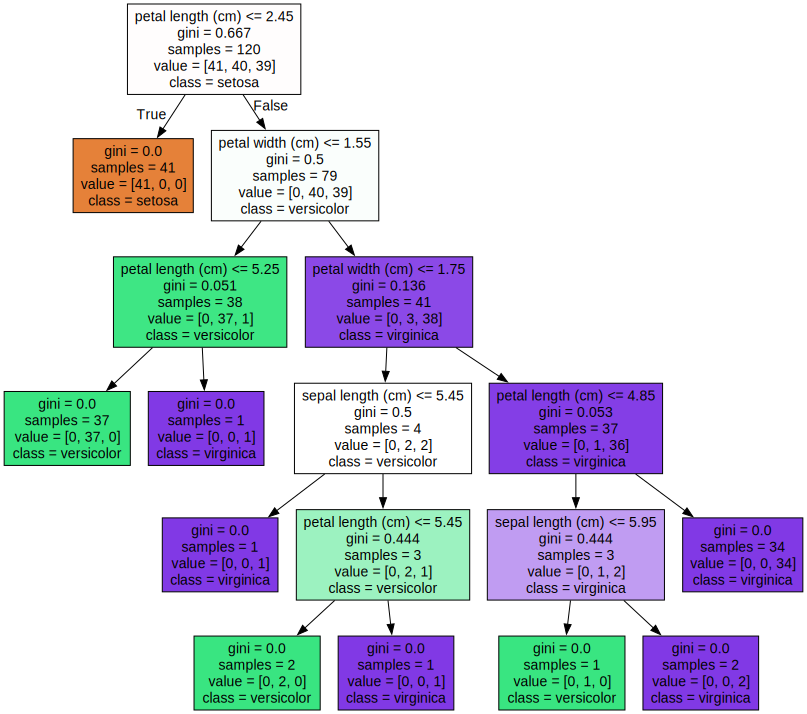

In [17]:
import graphviz

# 위에서 생성된 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화, 한단계 하위버전 적용.
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

색깔은 레이블을 나타낸다. 짙어질수록 = 지니계수가 낮다 = 균일하다.

In [12]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True, max_depth=4)

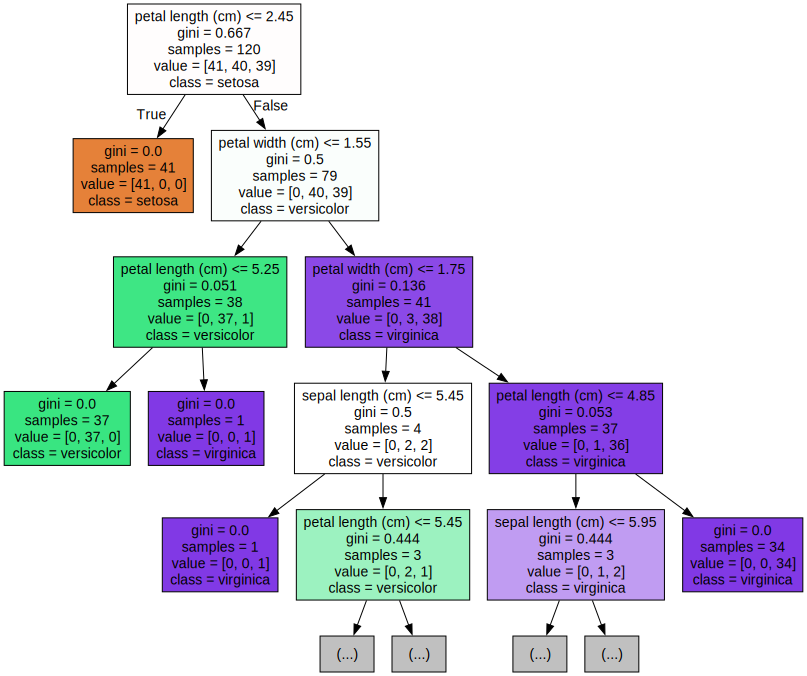

In [13]:
import graphviz

# 위에서 생성된 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화, 한단계 하위버전 적용.
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

최대 트리 깊이를 제어하니까 원래 보이던게 말줄임표로 나타나네.

In [21]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance는 피처가 트리 분할 시 정보 이득이나 지나 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것이다.
print(f"Feature importanves: {np.round(dt_clf.feature_importances_, 3)}")

# 피처별로 importanve 매핑한다면?
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

Feature importanves: [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

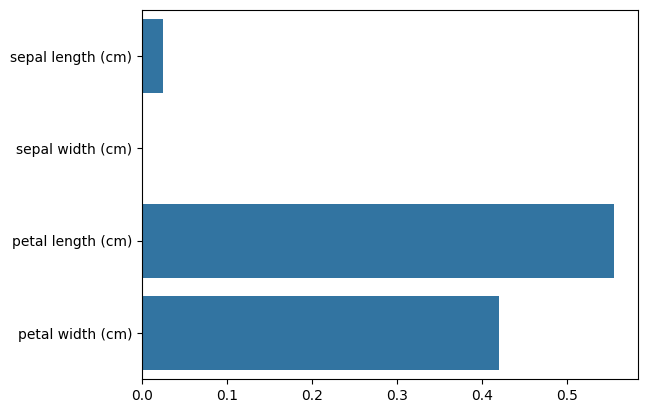

In [23]:
# 피처 중요도를 컬럼 별로 시각화하기 > petal_length가 가장 높음.
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 깨달은 점

1. 모델의 단점은 과적합으로 정확도가 떨어진다고만 외웠는데, 어떤 원리로 과적합이 이루어지는지 알게 됐고 정보의 균일도도 새로 배웠다.

2. 가능한 한 적은 결정 노드로 높은 정확도를 얻기 위해 트리의 수를 잘 조절하는 방법으로 다양한 파라미터와 사용법을 그래프로 익혔다.

## 03 관련 프로젝트

In [ ]:
하고 잘게요...

## 04 참고 링크

In [ ]:
하고 잘게ㅛㅇ..